<a href="https://colab.research.google.com/github/SaumyaGupta-99/sentimentanalysisontweets/blob/master/sentimentanalysisontweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
train=pd.read_csv('train.csv',encoding = "ISO-8859-1")
test=pd.read_csv("test.csv",encoding = "ISO-8859-1")

In [0]:
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [0]:
comb=train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,'',input_text)
  return input_text
comb['SentimentText']=np.vectorize(remove_pattern)(comb['SentimentText'],"@[\w]*")

In [0]:
comb['SentimentText']=comb['SentimentText'].str.replace("[^a-zA-Z#]",' ')
comb['SentimentText']

0                                        sad for apl friend
1                                 miss the new moon trailer
2                                            omg it alreadi
3         omgaga sooo gunna cri been thi dentist sinc wa...
4                                               think cheat
5                                       just worri too much
6                          juuuuuuuuuuuuuuuuussssst chillin
7                         sunni again work tomorrow tonight
8                       hand uniform today miss you alreadi
9                               hmmmm wonder how she number
10                                   must think about posit
11                         thank all the hater face all day
12                                  thi weekend ha suck far
13                             isnt show australia ani more
14                                             that you win
15                               thi the way feel right now
16        awhh man complet useless now f

In [0]:
comb['SentimentText']=comb['SentimentText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
comb['SentimentText'].head()

0                                   sad for APL friend
1                          missed the New Moon trailer
2                                      omg its already
3    Omgaga sooo gunna CRy been this dentist since ...
4                                       think cheating
Name: SentimentText, dtype: object

In [0]:
tokenized_tweets=comb['SentimentText'].apply(lambda x: x.split())
tokenized_tweets.head()

0                              [sad, for, APL, friend]
1                    [missed, the, New, Moon, trailer]
2                                  [omg, its, already]
3    [Omgaga, sooo, gunna, CRy, been, this, dentist...
4                                    [think, cheating]
Name: SentimentText, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweets.head()

0                              [sad, for, apl, friend]
1                      [miss, the, new, moon, trailer]
2                                   [omg, it, alreadi]
3    [omgaga, sooo, gunna, cri, been, thi, dentist,...
4                                       [think, cheat]
Name: SentimentText, dtype: object

In [0]:
for i in range(len(tokenized_tweets)):
  tokenized_tweets[i]=" ".join(tokenized_tweets[i])
comb['SentimentText']=tokenized_tweets
comb['SentimentText'].head()

0                                   sad for apl friend
1                            miss the new moon trailer
2                                       omg it alreadi
3    omgaga sooo gunna cri been thi dentist sinc wa...
4                                          think cheat
Name: SentimentText, dtype: object

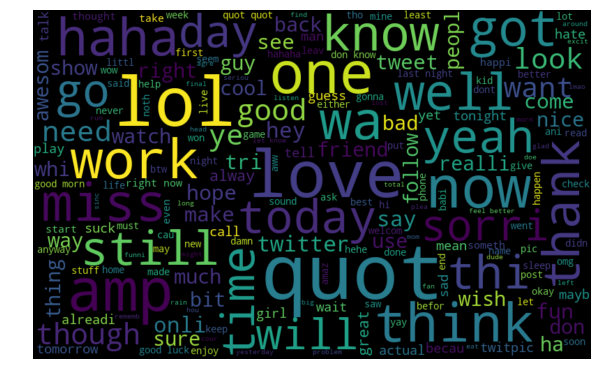

In [0]:
#visualization
all_words=' '.join([text for text in comb['SentimentText']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

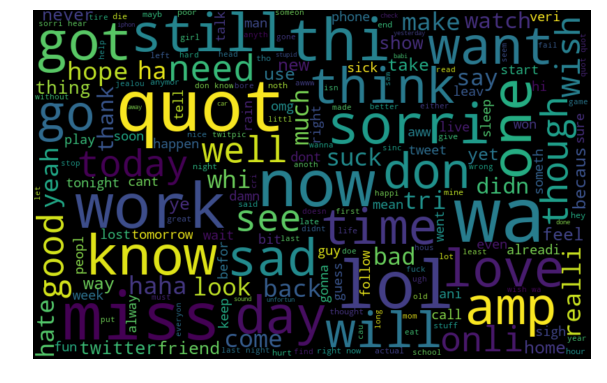

In [0]:
#sad negative tweets
words=' '.join([text for text in comb['SentimentText'][comb['Sentiment']==0]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

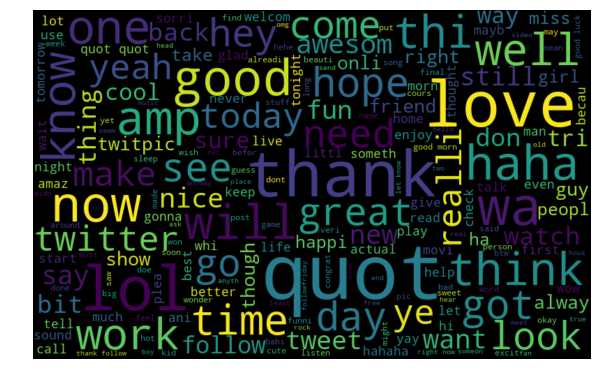

In [0]:
#happy positive tweets
words=' '.join([text for text in comb['SentimentText'][comb['Sentiment']==1]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
def hashtag_extract(x):
  hashtags=[]
  for i in x:
    ht=re.findall("#[\w]*",i)
    hashtags.append(ht)
  return hashtags
ht_positive=hashtag_extract(comb['SentimentText'][comb['Sentiment']==1])
ht_negative=hashtag_extract(comb['SentimentText'][comb['Sentiment']==0])
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])


['#poemsund', '#video', '#robotpickuplin', '#skydiv', '#andyhurleyday', '#asot', '#followfriday', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#mcflyforgermani', '#hello', '#world', '#beauti', '#woop', '#shortstack', '#tokiohotel', '#shortstack', '#tokiohotel', '#shortstack', '#tokiohotel', '#shortstack', '#tokiohotel', '#shortstack', '#tokiohotel', '#shortstack', '#geek', '#holiday', '#holiday', '#myweak', '#alpolit', '#followfriday', '#stat', '#followfriday', '#herschel', '#planck', '#musicmonday', '#followfriday', '#followfriday', '#squarespac', '#squarespac', '#clothdiap', '#canterburi', '#music', '#unfollowsunday', '#istillbeliev', '#', '#followfriday', '#sweatfest', '#marsiscom', '#marsiscom', '#marsiscom', '#marsiscoming', '#', '#aamaustin', '#actofgreen', '#asot', '#adiict', '#bollywood', '#afazenda', '#ahbl', '#albumoftheweek', '#alltimelow', '#alltimelow', '#alltimelow', '#alltimel

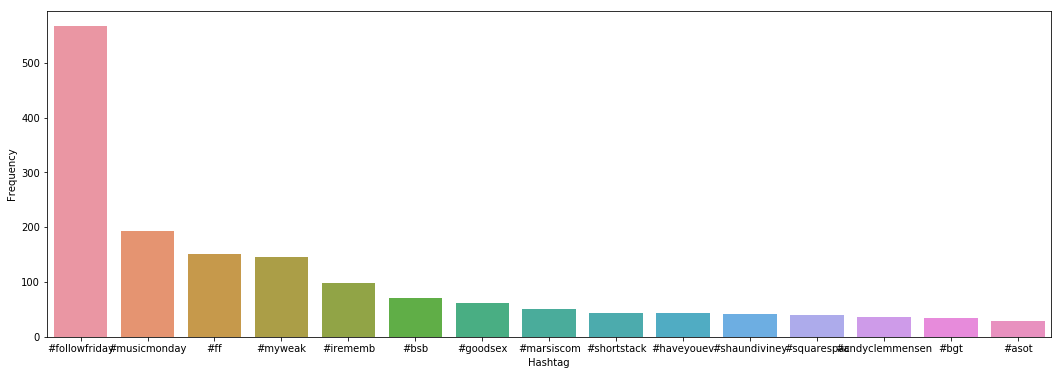

In [0]:
a=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=15)
plt.figure(figsize=(18,6))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Frequency')
plt.show()

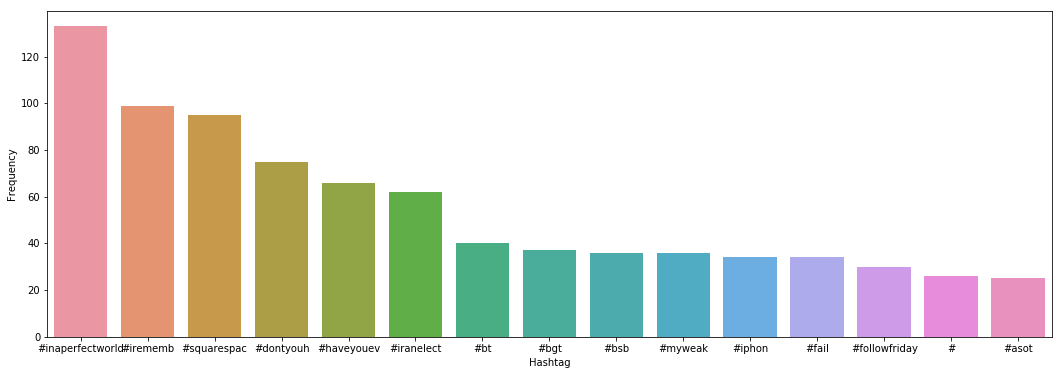

In [0]:
a=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=15)
plt.figure(figsize=(18,6))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Frequency')
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.80,min_df=2,stop_words='english')
bow=bow_vectorizer.fit_transform(comb['SentimentText'])


In [0]:
#using bag of words 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow = bow[:99989,:]
test_bow = bow[99989:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,train['Sentiment'], random_state=42, test_size=0.3)
lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7787269220170845

In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['Sentiment'] = test_pred_int


In [0]:
test.head()

,ItemID,SentimentText,Sentiment
0,1,is so sad for my APL frie...,0
1,2,I missed the New Moon trail...,0
2,3,omg its already 7:30 :O,1
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,5,i think mi bf is cheating on me!!! ...,1


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer =TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer .fit_transform(comb['SentimentText'])

In [0]:
train_tfidf = tfidf[:99989,:]
test_tfidf = tfidf[99989:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7737351045126001

In [0]:
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['Sentiment_tfidf'] = test_pred_int
test


,ItemID,SentimentText,Sentiment,Sentiment_tfidf
0,1,is so sad for my APL frie...,0,0
1,2,I missed the New Moon trail...,0,0
2,3,omg its already 7:30 :O,1,1
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,0,0
4,5,i think mi bf is cheating on me!!! ...,1,1
5,6,or i just worry too much?,1,1
6,7,Juuuuuuuuuuuuuuuuussssst Chillin!!,1,1
7,8,Sunny Again Work Tomorrow :-| ...,1,1
8,9,handed in my uniform today . i miss you ...,0,0
9,10,hmmmm.... i wonder how she my number @-),1,1
